# 식용 버섯과 독버섯 분류

## https://www.kaggle.com/uciml/mushroom-classification
#### Mushroom Classification Data link

In [74]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
data = pd.read_csv('mushroom_dataset.csv')

In [76]:
data.shape

(8124, 23)

In [77]:
pd.set_option('display.max_columns', 50) # 데이터 프레임 최대 컬럼 수 설정
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [78]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 컬럼 설명
- class : p = 독버섯, e = 식용 가능 버섯
- cap-shape : 

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
# 라벨 인코딩
le = LabelEncoder()

for col in data.columns:
    le.fit(data[col])

    print(col)
    print(f'{le.classes_} ===> {le.transform(le.classes_)}')
    
    data[col] = le.transform(data[col])

class
['e' 'p'] ===> [0 1]
cap-shape
['b' 'c' 'f' 'k' 's' 'x'] ===> [0 1 2 3 4 5]
cap-surface
['f' 'g' 's' 'y'] ===> [0 1 2 3]
cap-color
['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y'] ===> [0 1 2 3 4 5 6 7 8 9]
bruises
['f' 't'] ===> [0 1]
odor
['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y'] ===> [0 1 2 3 4 5 6 7 8]
gill-attachment
['a' 'f'] ===> [0 1]
gill-spacing
['c' 'w'] ===> [0 1]
gill-size
['b' 'n'] ===> [0 1]
gill-color
['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y'] ===> [ 0  1  2  3  4  5  6  7  8  9 10 11]
stalk-shape
['e' 't'] ===> [0 1]
stalk-root
['?' 'b' 'c' 'e' 'r'] ===> [0 1 2 3 4]
stalk-surface-above-ring
['f' 'k' 's' 'y'] ===> [0 1 2 3]
stalk-surface-below-ring
['f' 'k' 's' 'y'] ===> [0 1 2 3]
stalk-color-above-ring
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y'] ===> [0 1 2 3 4 5 6 7 8]
stalk-color-below-ring
['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y'] ===> [0 1 2 3 4 5 6 7 8]
veil-type
['p'] ===> [0]
veil-color
['n' 'o' 'w' 'y'] ===> [0 1 2 3]
ring-number
['n' 'o' 't'] ===> [0 1 2]
ring-type
['

## 컬럼명 변경 코드
### data.rename(columns={"class":"species"}, inplace=True)

# Decision Tree Classifier

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [82]:
mushroom_data = data
cols = list(mushroom_data.columns)
label = cols.pop(0)

X = mushroom_data.loc[:, cols]
y = mushroom_data[label]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
mushroom_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
mushroom_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = mushroom_tree.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(f'Precison: {precision_score(y_test, pred)}')
print(f'Recall: {recall_score(y_test, pred)}')
print(f'F1 score: {f1_score(y_test, pred)}')

Accuracy: 0.9811320754716981
Precison: 0.9748953974895398
Recall: 0.9864521591871296
F1 score: 0.9806397306397308


In [102]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

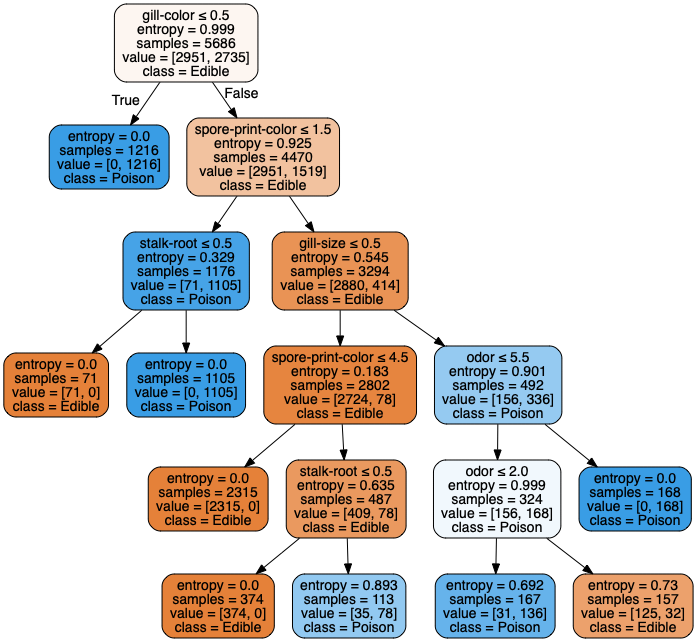

In [103]:
dot_data = export_graphviz(mushroom_tree, out_file=None, feature_names=cols,
                          class_names=['Edible','Poison'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Logistic Regression Classifier

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/Users/kimyongho/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, pred)}')
print(f'Precison: {precision_score(y_test, pred)}')
print(f'Recall: {recall_score(y_test, pred)}')
print(f'F1 score: {f1_score(y_test, pred)}')

Accuracy: 0.9491386382280558
Precison: 0.9520958083832335
Recall: 0.9424216765453006
F1 score: 0.9472340425531913
